# Dentist Data Aanalysis - Experiments

In [1]:
# !conda install -y -c anaconda numpy=1.19.2
# !conda install -y -c anaconda pandas=1.2.4
# !conda install -y -c anaconda openpyxl=3.0.7
# !conda install -y -c conda-forge matplotlib=3.4.2
# !conda install -y -c anaconda seaborn=0.11.1
# !conda install -y -c anaconda scikit-learn=0.24.1
# !conda install -y -c conda-forge imbalanced-learn=0.8.0
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

## Common

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/'
DIR = ''

### Columns

In [3]:
def inverse_dict(p_dict):
    v_dict = {}
    for key, value in p_dict.items():
        v_dict[value] = key
    return v_dict

column_SR_to_EN = {
            'Pit1': 'Que1', 'Pit2': 'Que2', 'Pit3': 'Que3', 'Pit4': 'Que4', 'Pit5': 'Que5', 'Pit6': 'Que6', 'Pit7': 'Que7', 'Pit8': 'Que8', 'Pit9': 'Que9', 'Pit10_a': 'Que10_a', 
            'Pit10_b': 'Que10_b', 'Pit10_c': 'Que10_c', 'Pit10_d': 'Que10_d', 'Pit10_e': 'Que10_e', 'Pit10_f': 'Que10_f', 'Pit11': 'Que11', 'Pit12': 'Que12', 'Pit13': 'Que13', 
            'Pit14': 'Que14', 'Pit15': 'Que15', 'Pit16': 'Que16', 'Pit17': 'Que17', 'Pit18_starost': 'Que18_age', 'Pit19': 'Que19', 'Pit20': 'Que20', 'Pit21': 'Que21', 
            'Pit22': 'Que22', 'Pit23': 'Que23', 'Pit24': 'Que24', 'Pit25': 'Que25', 'Pit25_blizanac': 'Que25_twin', 'Pit26': 'Que26', 'Pit27': 'Que27', 'Pit27_blizanac': 'Que27_twin', 
            'Pit28': 'Que28', 'Pit28_blizanac': 'Que28_twin', 'Pit29': 'Que29', 'Pit30': 'Que30', 'Pit31': 'Que31', 'Pit32': 'Que32', 'Pit33': 'Que33', 'Pit34': 'Que34', 'Pit35': 'Que35'
}
column_EN_to_SR = inverse_dict(column_SR_to_EN)

source_columns_SR = [
            'Pit1', 'Pit2', 'Pit3', 'Pit4', 'Pit5', 'Pit6', 'Pit7', 'Pit8', 'Pit9', 'Pit10_a', 
            'Pit10_b', 'Pit10_c', 'Pit10_d', 'Pit10_e', 'Pit10_f', 'Pit11', 'Pit12', 'Pit13', 
            'Pit14', 'Pit15', 'Pit16', 'Pit17', 'Pit18_starost', 'Pit19', 'Pit20', 'Pit21', 
            'Pit22', 'Pit23', 'Pit24', 'Pit25', 'Pit25_blizanac', 'Pit26', 'Pit27', 'Pit27_blizanac', 
            'Pit28', 'Pit28_blizanac', 'Pit29', 'Pit30', 'Pit31', 'Pit32', 'Pit33', 'Pit34', 'Pit35'
            ]
source_columns_EN = [column_SR_to_EN[k] for k in column_SR_to_EN]

### Questions

In [4]:
questions_EN = {
    'Que1': {
        'text': 'How often did you brush your teeth during pregnancy?', 
        1: "I didn't brush my teeth at all (go to  question 4)", 
        3: "I don't brush my teeth every day", 
        5: 'Once a day', 
        2: 'Twice a day', 
        4: 'More than twice a day'}, 
    'Que2': {
        'text': 'During pregnancy, when do you brush your teeth during the day?', 
        1: 'After every meal', 
        3: 'Morning (before breakfast) and evening (before bedtime)', 
        5: 'Morning (after breakfast) and evening (before bedtime)', 
        2: 'Morning or evening (regardless of meal)', 
        4: 'After lunch or after breakfast', 
        6: 'Different from the above'}, 
    'Que3': {
        'text': 'How long did you brush your teeth during pregnancy?', 
        1: 'Less than 1 minute', 
        3: '1-2 minutes', 
        2: 'More than 2 minutes', 
        4: "I can't judge"}, 
    'Que4': {
        'text': 'What did you use to clean your teeth during pregnancy (you can choose more than one answer)?', 
        1: 'Just a brush', 
        4: 'Brush and paste', 
        2: 'Toothpicks', 
        5: 'Dental floss', 
        3: 'None of the above', 
        6: 'Other'}, 
    'Que5': {
        'text': 'How many times have you visited your dentist during pregnancy?', 
        1: 'Never (go to question 7)', 
        3: 'Once time', 
        2: 'Twice', 
        4: 'More than twice'}, 
    'Que6': {
        'text': 'What was the most important reason you visited your dentist during your pregnancy?', 
        1: 'Regular monitoring and counseling', 
        4: 'Pain', 
        2: 'Tooth Extraction', 
        5: 'Tooth Fill', 
        3: 'Limestone Removal', 
        6: 'Other reasons'}, 
    'Que7': {
        'text': "If you didn't go to the dentist as many times as you thought, or you should or didn't go to the dentist at all during pregnancy, this was mainly because (you can choose more answers):", 
        1: 'Fear', 
        3: "It's expensive for you", 
        5: 'It is far from the place of residence', 
        7: 'You feel like you went as far as it took', 
        2: "You didn't need to", 
        4: "It doesn't matter to you", 
        6: 'Other reasons'}, 
    'Que8': {
        'text': 'How often did you take fluoride tablets during pregnancy?', 
        1: 'Every day, from the fourth month of pregnancy, 1 mg per day', 
        3: "I didn't take it every day", 
        2: "I didn't take it at all", 
        4: "I don't know if I took it"}, 
    'Que9': {
        'text': 'Who recommended fluoride tablets to you (if more than one person, specify who did it first)?', 
        1: 'Gynecologist', 
        3: 'Dentist', 
        5: 'Pediatrician', 
        7: "Nobody, this is the first time I've heard of this", 
        2: 'A friend or relative', 
        4: 'Someone else', 
        6: 'Self-taught (read somewhere, etc.)', 
        8: 'I do not remember'}, 
    'Que10_a': {
        'text': 'Please indicate how often you took the following foods (option: milk and dairy products) during pregnancy:',
        1: 'Daily', 
        2: 'Several times a week', 
        3: 'Rare', 
        4: 'Never'}, 
    'Que10_b': {
        'text': 'Please indicate how often you took the following foods (option: meat) during pregnancy:',
        1: 'Daily', 
        2: 'Several times a week', 
        3: 'Rare', 
        4: 'Never'}, 
    'Que10_c': {
        'text': 'Please indicate how often you took the following foods (option: fish) during pregnancy:',
        1: 'Daily', 
        2: 'Several times a week', 
        3: 'Rare', 
        4: 'Never'}, 
    'Que10_d': {
        'text': 'Please indicate how often you took the following foods (option: eggs) during pregnancy:',
        1: 'Daily', 
        2: 'Several times a week', 
        3: 'Rare', 
        4: 'Never'}, 
    'Que10_e': {
        'text': 'Please indicate how often you took the following foods (option: fruits and vegetables) during pregnancy:',
        1: 'Daily', 
        2: 'Several times a week', 
        3: 'Rare', 
        4: 'Never'}, 
    'Que10_f': {
        'text': 'Please indicate how often you took the following foods (option: sweets) during pregnancy:',
        1: 'Daily', 
        2: 'Several times a week', 
        3: 'Rare', 
        4: 'Never'}, 
    'Que11': {
        'text': 'Did you smoke in the first three months of pregnancy (first trimester)?', 
        1: 'Yes, every day', 
        2: 'Yes, occasionally', 
        3: 'Not'}, 
    'Que12': {
        'text': 'Did you smoke during the three months of pregnancy (second trimester)?', 
        1: 'Yes, every day', 
        2: 'Yes, occasionally', 
        3: 'Not'}, 
    'Que13': {
        'text': 'Have you smoked in the last three months of pregnancy (third trimester)?', 
        1: 'Yes, every day', 
        2: 'Yes, occasionally', 
        3: 'Not'}, 
    'Que14': {
        'text': 'Have you been drinking since you found out about pregnancy?', 
        1: 'Yes, every day', 
        2: 'Yes, several times a week', 
        4: 'Yes, several times a month', 
        5: 'Yes, once a month or less', 
        3: 'Not at all'}, 
    'Que15': {
        'text': 'How would you rate the condition of your teeth?', 
        1: 'Very well', 
        4: 'Good', 
        2: 'Average', 
        5: 'Bad', 
        3: 'Very bad', 
        6: "I can't judge"}, 
    'Que16': {
        'text': 'How many teeth are you missing?', 
        1: 'I have all my teeth', 
        4: "I'm missing 1-5 teeth", 
        2: "I'm missing 6-10 teeth", 
        5: 'Over 10 teeth, but not all', 
        3: "I don't have a single tooth", 
        6: 'I do not know'}, 
    'Que17': {
        'text': 'Do you have a prosthesis?', 
        1: "I don't have a prosthesis", 
        2: 'Yes, I have a partial denture', 
        3: 'Yes, I have a total denture'}, 
    'Que18_age': {
        'text': 'How old are you (fill in the box in front of the year)?', 
        1: 15, 2: 16, 3: 17, 4: 18, 5: 19, 6:20, 7: 21, 8: 22, 9: 23, 10: 24, 11: 25, 12:26, 
        13: 27, 14: 28, 15: 29, 16: 30, 17: 31, 18: 32, 19: 33, 20: 34, 21: 35, 22: 36, 23: 37, 24: 38, 
        25: 39, 26:40, 27: 41, 28: 42, 29: 43, 30: 44, 31: 45, 32: 46, 33: 47, 34: 48, 35: 49, 36:50},
    'Que19': {
        'text': 'What is the school with the highest level you have graduated from?', 
        1: 'Not educated at all, or incomplete primary school', 
        3: 'Primary school completed', 
        2: 'Secondary (High) school / Grammar School (3 or 4 years)', 
        4: 'College or university'}, 
     'Que20': {
        'text': 'What is your marital status?', 
        1: 'I have never been married or lived in an extramarital affair', 
        2: 'In marriage / cohabitation', 
        3: 'Divorced or extramarital union ended in divorce (I did not remarry or enter into a community extramarital affair)', 
        4: 'The widow or extramarital affair ended in the death of my partner (I did not remarry and did not enter into an extramarital union)'}, 
    'Que21': {
        'text': 'How would you define your current employment status?', 
        1: 'I work for a salary or a profit (includes those who take care of the work in the family business, do paid internships, as well as those who are not currently working due to maternity leave)', 
        2: 'Unemployed', 
        3: 'Pupil, student, specialization, professional practice without payment', 
        4: 'Other'}, 
    'Que22': {
        'text': 'How do you assess your financial situation?', 
        1: 'Very bad', 
        4: 'Bad', 
        2: 'Average', 
        5: 'Good', 
        3: 'Very good'}, 
    'Que23': {
        'text': 'How was your birth?', 
        1: 'On time', 
        2: 'Premature', 
        3: 'Overdue'}, 
    'Que24': {
        'text': 'What was the way of your birth giving?', 
        1: 'Spontaneous, natural (vaginal)', 
        2: 'Difficult (forceps)', 
        3: 'Caesarian'},
    'Que25': {
        'text': 'What is the gender of your child (mothers who had twins fill in the left column for the older and the right for the younger twin and mothers with one child fill in only the left column)?', 
        1: 'Male', 
        2: 'Female'},
    'Que25_twin': {
        'text': 'What is the gender of your child (mothers who had twins fill in the left column for the older and the right for the younger twin and mothers with one child fill in only the left column)?', 
        1: 'Male', 
        2: 'Female'},
    'Que26': {
        'text': 'What is this child of yours in order (mothers with twins fill two boxes)?', 
        1: 'First', 
        3: 'Second', 
        5: 'Third', 
        2: 'Fourth', 
        4: 'Fifth', 
        6: 'Sixth or more'}, 
    'Que27': {
        'text': 'What grade did your child receive at birth - Apgar Score (mothers who had twins fill in the left column for the older and the right for the younger twin and mothers with one child fill in only the left column)?', 
        1: 'Ten - 10', 
        2: 'Nine - 9', 
        3: 'Eight - 8', 
        4: 'Seven - 7', 
        5: 'Six - 6'},
    'Que27_twin': {
        'text': 'What grade did your child receive at birth - Apgar Score (mothers who had twins fill in the left column for the older and the right for the younger twin and mothers with one child fill in only the left column)?', 
        1: 'Ten - 10', 
        2: 'Nine - 9', 
        3: 'Eight - 8', 
        4: 'Seven - 7', 
        5: 'Six - 6'},
    'Que28': {
        'text': 'What is the weight of your child (mothers who had twins fill in the left column for the older and the right for the younger twin and mothers with one child fill in only the left column)?', 
        1: 'Less than 2000 grams', 
        2: 'Between 2000 and 2500 grams', 
        3: 'Over 2500 grams'},
    'Que28_twin': {
        'text': 'What is the weight of your child (mothers who had twins fill in the left column for the older and the right for the younger twin and mothers with one child fill in only the left column)?', 
        1: 'Less than 2000 grams', 
        2: 'Between 2000 and 2500 grams', 
        3: 'Over 2500 grams'},
    'Que29': {
        'text': 'Are you planning to breastfeed your baby?', 
        1: 'No', 
        4: 'Yes, at least 3 months', 
        6: 'Yes, from 3 to 6 months', 
        2: 'Yes, from 6 to 12 months', 
        5: 'Yes, at least 12 months', 
        7: 'Yes, over 12 months', 
        3: "I don't know"}, 
    'Que30': {
        'text': 'Are you planning to give your child a cheating pacifier?', 
        1: 'Yes, as long as the child asks', 
        2: 'Yes, at least one year', 
        4: 'Yes, only until the first tooth erupts', 
        5: 'Not at all', 
        3: "I don't know"}, 
    'Que31': {
        'text': 'Do you plan to feed your child on a bottle for more than 1 year and a half:', 
        1: 'Yes', 
        2: 'No', 
        3: "I don't know"}, 
    'Que32': {
        'text': 'Do you plan to additionally sweeten any food that you will give to your child in the first two years of life?', 
        1: 'Yes, always (daily or several times a week)', 
        4: 'Yes, at times (several times a month)', 
        2: 'Really rare (several times a year)', 
        5: 'No, never', 
        3: "I don't know"}, 
    'Que33': {
        'text': 'When feeding your child (until he learns to be independent), will you try food from his spoon or lick the pacifier?', 
        1: 'Yes, always', 
        4: 'Yes, at times', 
        2: 'Really rare', 
        5: 'No, never', 
        3: "I don't know"}, 
    'Que34': {
        'text': 'When you plan to take your child to the dentist for the first time?', 
        1: 'In the first year of life', 
        4: 'In the second year of life', 
        2: 'In the third year of life', 
        5: 'Between 4 and 6 years of life', 
        6: 'After the child starts school or later', 
        3: "I don't know"},
    'Que35': {
        'text': 'Would you like your child to participate in a caries prevention program in early childhood next year and receive a call from a dentist for an examination?', 
        1: 'Yes', 
        2: 'No', 
        3: "I'm not sure"}} 

In [5]:
questions_SR = {
    'Pit1': {
        'text': 'Koliko često ste tokom trudnoće prali zube?', 
        1: "Nisam uopšte prala zube (pređite na 4. pitanje)", 
        3: "Nisam prala zube svaki dan", 
        5: 'Jednom', 
        2: 'Dva puta dnevno', 
        4: 'Više od dva puta dnevno'}, 
    'Pit2': {
        'text': 'Tokom trudnoće, kada ste u toku dana prali zube?', 
        1: 'Posle svakog obroka', 
        3: 'Ujutro (pre doručka) i uveče (pre spavanja)', 
        5: 'Ujutro (posle doručka) i uveče (pre spavanja)', 
        2: 'Ujutro ili uveče (nezavisno od obroka)', 
        4: 'Posle ručka ili posle doručka', 
        6: 'Drugačije od navedenog'}, 
    'Pit3': {
        'text': 'Koliko dugo ste tokom trudnoće prali zube?', 
        1: 'Manje od minut', 
        3: '1-2 minuta', 
        2: 'Više od 2 minuta', 
        4: "Ne mogu da procenim"}, 
    'Pit4': {
        'text': 'Šta ste koristili za čišćenje svojih zuba u toku trudnoće (možete zaokružiti više odgovora)?', 
        1: 'Samo četkicu', 
        4: 'Četkicu i pastu', 
        2: 'Čačkalice', 
        5: 'Konac za zube', 
        3: 'Ništa od navedenog', 
        6: 'Drugo'}, 
    'Pit5': {
        'text': 'Koliko puta ste za vreme trudnoće posetili stomatologa?', 
        1: 'Nijednom (pređite na 7. pitanje)', 
        3: 'Jednom', 
        2: 'Dva puta', 
        4: 'Više od dva puta'}, 
    'Pit6': {
        'text': 'Koji je bio Vaš najvažniji razlog posete stomatologu za vremene trudnoće?', 
        1: 'Redovna kontrola i savetovanje', 
        4: 'Bol', 
        2: 'Vađenje zuba', 
        5: 'Plombiranje zuba', 
        3: 'Uklanjanje kamenca', 
        6: 'Drugi razlozi'}, 
    'Pit7': {
        'text': "Ukoliko niste otišli kod stomatologa onoliko puta koliko ste smatrali da treba, ili uopšte niste bili kod stomatologa za vreme trudnoće, to je najvećim delom bilo zbog toga što (možete zaokružiti više odgovora):", 
        1: 'Imate strah', 
        3: "Skupo Vam je", 
        5: 'Daleko je od mesta Vašeg stanovanja', 
        7: 'Smatrate da ste išli koliko je bilo potrebno', 
        2: "Niste imali potrebe", 
        4: "Nije Vam Važno", 
        6: 'Drugi razlozi'}, 
    'Pit8': {
        'text': 'Koliko često ste uzimali tokom trudnoće tablete fluorida?', 
        1: 'Svakodnevno, od 4. meseca trudnoće, 1 mg dnevno', 
        3: "Nisam uzimala svakodnevno", 
        2: "Nisam uzimala uopšte", 
        4: "Ne znam da li sam uzimala"}, 
    'Pit9': {
        'text': 'Ko Vam je preporučio tablete flourida (ako je više osoba, navedite ko je to prvi uradio)?', 
        1: 'Ginekolog', 
        3: 'Stomatolog', 
        5: 'Pedijatar', 
        7: "Niko, sada prvi put čujem o tome", 
        2: 'Prijeteljica ili rođaka', 
        4: 'Neko drugi', 
        6: 'Samoinicijativno (pročitali ste negdje i sl)', 
        8: 'Ne sećam se'}, 
    'Pit10_a': {
        'text': 'Molim vas da navedete koliko često ste u toku trudnoće uzimali sledeće namirnice (mleko i mlečne proizvode):',
        1: 'Svakodnevno', 
        2: 'Nekoliko puta nedeljno', 
        3: 'Ređe', 
        4: 'Nikad'}, 
    'Pit10_b': {
        'text': 'Molim vas da navedete koliko često ste u toku trudnoće uzimali sledeće namirnice (meso):',
        1: 'Svakodnevno', 
        2: 'Nekoliko puta nedeljno', 
        3: 'Ređe', 
        4: 'Nikad'}, 
    'Pit10_c': {
        'text': 'Molim vas da navedete koliko često ste u toku trudnoće uzimali sledeće namirnice (ribu):',
        1: 'Svakodnevno', 
        2: 'Nekoliko puta nedeljno', 
        3: 'Ređe', 
        4: 'Nikad'}, 
    'Pit10_d': {
        'text': 'Molim vas da navedete koliko često ste u toku trudnoće uzimali sledeće namirnice (jaja):',
        1: 'Svakodnevno', 
        2: 'Nekoliko puta nedeljno', 
        3: 'Ređe', 
        4: 'Nikad'}, 
    'Pit10_e': {
        'text': 'Molim vas da navedete koliko često ste u toku trudnoće uzimali sledeće namirnice (voće i povrće):',
        1: 'Svakodnevno', 
        2: 'Nekoliko puta nedeljno', 
        3: 'Ređe', 
        4: 'Nikad'}, 
    'Pit10_f': {
        'text': 'Molim vas da navedete koliko često ste u toku trudnoće uzimali sledeće namirnice (slatkiše):',
        1: 'Svakodnevno', 
        2: 'Nekoliko puta nedeljno', 
        3: 'Ređe', 
        4: 'Nikad'}, 
    'Pit11': {
        'text': 'Da li ste tokom prva tri meeseca trudnoće (prvi trimestar) pušili?', 
        1: 'Da, svakodnevno', 
        2: 'Da, povremeno', 
        3: 'Ne'}, 
    'Pit12': {
        'text': 'Da li ste tokom sledeća tri meeseca trudnoće (drugi trimestar) pušili?', 
        1: 'Da, svakodnevno', 
        2: 'Da, povremeno', 
        3: 'Ne'}, 
    'Pit13': {
        'text': 'Da li ste tokom sledeća tri meeseca trudnoće (treći trimestar) pušili?', 
        1: 'Da, svakodnevno', 
        2: 'Da, povremeno', 
        3: 'Ne'}, 
    'Pit14': {
        'text': 'Da li ste od momenta saznanja za trudnoću pili alkoholna pića?', 
        1: 'Da, svakodnevno', 
        2: 'Dam nekoliko puta nedeljno', 
        4: 'Da, nekoliko puta mesečno', 
        5: 'Da, jedanput mesečno ili ređe', 
        3: 'Ne, uopšte'}, 
    'Pit15': {
        'text': 'Kako biste procenili stanje svojih zuba?', 
        1: 'Veoma dobro', 
        4: 'Dobro', 
        2: 'Prosečno', 
        5: 'Loše', 
        3: 'Veoma loše', 
        6: "Ne mogu da procenim"}, 
    'Pit16': {
        'text': 'Koliko zuba vam nedostaje', 
        1: 'Imam sve zube', 
        4: "Nedostaje mi 1-5 zuba", 
        2: "Nedostaje mi 6-10 zuba", 
        5: 'Više od 10 zuba ali ne svi', 
        3: "Nemam ni jedan zub", 
        6: 'Ne znam'}, 
    'Pit17': {
        'text': 'Da li imate protezu?', 
        1: "Nemam protezu", 
        2: 'Da, imam parcijalnu protezu', 
        3: 'Da, imam totalnu protezu'}, 
    'Pit18_starost': {
        'text': 'Koliko imate godina (popunite kućicu ispred godine)?', 
        1: 15, 2: 16, 3: 17, 4: 18, 5: 19, 6:20, 7: 21, 8: 22, 9: 23, 10: 24, 11: 25, 12:26, 
        13: 27, 14: 28, 15: 29, 16: 30, 17: 31, 18: 32, 19: 33, 20: 34, 21: 35, 22: 36, 23: 37, 24: 38, 
        25: 39, 26:40, 27: 41, 28: 42, 29: 43, 30: 44, 31: 45, 32: 46, 33: 47, 34: 48, 35: 49, 36:50},
    'Pit19': {
        'text': 'Koja je najviša škola koju ste završili?', 
        1: 'Bez škole ili nepotpuna osnovna škola', 
        3: 'Završena osnovna škola', 
        2: 'Završena srednja škola/gimnazija (3 ili 4 godine)', 
        4: 'Viša ili visoka škola (fakultet)'}, 
     'Pit20': {
        'text': 'Koji je vaš bračni status?', 
        1: 'Nikad se nisam udavala ni živela u vanbračnoj zajednici', 
        2: 'U braku/vanbračnoj zajednici', 
        3: 'Razvedena ili se vanbračna zajednica završila razlazom (nisam se ponovo udavala niti stupala u vanbračnu zajednicu)', 
        4: 'Udovica ili se vanbračna zajednica završila smrću partnera (nisam se ponovo udavala niti stupala u vanbračnu zajednicu'}, 
    'Pit21': {
        'text': 'Kako biste definisali Vaš trenutni radni status?', 
        1: 'Radim za platu ili profil (uključuje i one koji rade u porodičnom biznisu, obavljaju plaćen pripravnički staž, kao i one koji trenutno ne rade zbog porodiljskog odsustva)', 
        2: 'Nezaposlen', 
        3: 'Učenik, student, usavršavanje, stručna praksa bez plaćanja', 
        4: 'Drugo'}, 
    'Pit22': {
        'text': 'Kako procenjujete Vaše materijalno stanje?', 
        1: 'Veoma loše', 
        4: 'Loše', 
        2: 'Prosečno', 
        5: 'Dobro', 
        3: 'Veoma dobro'}, 
    'Pit23': {
        'text': 'Da li je Vaš porođaj bio?', 
        1: 'Na vreme', 
        2: 'Prevremen', 
        3: 'Prenešen'}, 
    'Pit24': {
        'text': 'Koji je bio način vašeg porođaja?', 
        1: 'Spontan, prirodni (vaginalni)', 
        2: 'Težak (forceps...)', 
        3: 'Carski rez'},
    'Pit25': {
        'text': 'Koji je pol vašeg deteta (majke koje su imale blizance levu kolonu popunjavaju za starijeg a desnuza mlađeg blizanca a majke sa jednim detetom popunjavaju samo levu kolonu)?', 
        1: 'Muški', 
        2: 'Ženski'},
    'Pit25_blizanac': {
        'text': 'Koji je pol vašeg deteta (majke koje su imale blizance levu kolonu popunjavaju za starijeg a desnuza mlađeg blizanca a majke sa jednim detetom popunjavaju samo levu kolonu)?', 
        1: 'Muški', 
        2: 'Ženski'},
    'Pit26': {
        'text': 'Koje vam je ovo dete po redu (majke sa blizancima popunjavaju dve kućice)?', 
        1: 'Prvo', 
        3: 'Drugo', 
        5: 'Treće', 
        2: 'Četvrto', 
        4: 'Peto', 
        6: 'Šesto ili više'}, 
    'Pit27': {
        'text': 'Koju ocenu je Vaše dete dobilo na porođaju - Apgar skor (majke koje su imale blizance levu kolonu popunjavaju za starijeg a desnu za mlađeg blizanca a majke sa jednim detetom popunjavaju samo levu kolonu)?', 
        1: 'Deset - 10', 
        2: 'Devet - 9', 
        3: 'Osam - 8', 
        4: 'Sedam - 7', 
        5: 'Šest - 6'},
    'Pit27_blizanac': {
        'text': 'Koju ocenu je Vaše dete dobilo na porođaju - Apgar skor (majke koje su imale blizance levu kolonu popunjavaju za starijeg a desnu za mlađeg blizanca a majke sa jednim detetom popunjavaju samo levu kolonu)?', 
        1: 'Deset - 10', 
        2: 'Devet - 9', 
        3: 'Osam - 8', 
        4: 'Sedam - 7', 
        5: 'Šest - 6'},
    'Pit28': {
        'text': 'Koje je težine vaše dete (majke koje su imale blizance levu kolonu popunjavaju za starijeg a desnu za mlađeg blizanca a majke sa jednim detetom popunjavaju samo levu kolonu)?', 
        1: 'Lakše od 2000 grama', 
        2: 'Od 2000 do 2500 grama', 
        3: 'Teže od 2500 grama'},
    'Pit28_blizanac': {
        'text': 'Koje je težine vaše dete (majke koje su imale blizance levu kolonu popunjavaju za starijeg a desnu za mlađeg blizanca a majke sa jednim detetom popunjavaju samo levu kolonu)?', 
        1: 'Lakše od 2000 grama', 
        2: 'Od 2000 do 2500 grama', 
        3: 'Teže od 2500 grama'},
    'Pit29': {
        'text': 'Da li planirate da dojite svoje dete?', 
        1: 'Ne', 
        4: 'Da, najmanje 3 meseca', 
        6: 'Da, od 3 do 6 meseci', 
        2: 'Da, od 6 do 12 meseci', 
        5: 'Da, najmanje 12 meseci', 
        7: 'Da, duže od 12 meseci', 
        3: "Ne znam"}, 
    'Pit30': {
        'text': 'Da li planirate da vašem detetu dajete cuclu (varalicu)?', 
        1: 'Da, sve dok dete traži', 
        2: 'Da, do kraja prve godine', 
        4: 'Da, samo dok ne niknu prvi zubi', 
        5: 'Ne, uopšte', 
        3: "Ne znam"}, 
    'Pit31': {
        'text': 'Da li planirate da dete pojite (hranite) na flašicu duže od 1,5 godine:', 
        1: 'Da', 
        2: 'Ne', 
        3: "Ne znam"}, 
    'Pit32': {
        'text': 'Da li planirate da dodatno zaslađujete bilo koju hranu koju ćete davati detetu u prve dve godine života?', 
        1: 'Da, redovno (svakodnevno ili više puta nedeljno)', 
        4: 'Da, povremeno (nekoliko puta mesečno)', 
        2: 'Veoma retko (nekoliko puta godišnje)', 
        5: 'Ne, nikad', 
        3: "Ne znam"}, 
    'Pit33': {
        'text': 'Da li ćete prilikom hranjenja Vašeg deteta (dok ne nauči da bude samostalno) probati hranu iz njegove kašičice ili oblizati cuclu?', 
        1: 'Da, redovno', 
        4: 'Da, povremeno', 
        2: 'Veoma retko', 
        5: 'Ne, nikad', 
        3: "Ne znam"}, 
    'Pit34': {
        'text': 'Kada planirate da vaše dete prvi put odvedete kod stomatologa?', 
        1: 'U prvoj godini deteta', 
        4: 'U drugoj godini deteta', 
        2: 'U trećoj godini deteta', 
        5: 'Od 4 do 6 godine deteta', 
        6: 'Po polasku deteta u školu ili kasnije', 
        3: "Ne znam"},
    'Pit35': {
        'text': 'Da li biste želeli da Vaše dete sledeće godine učestvuje u programu prevencije nastanka karijesa u ranom detinjstvu i dobije poziv od stomatologa za pregled?', 
        1: 'Da', 
        2: 'Ne', 
        3: "Nisam sigurna"}} 

### Questions mapping

In [6]:
questions_map_SR = {
    'Pit3': {
        'text': 'Koliko dugo ste tokom trudnoće prali zube?', 
        1: 1, 
        3: 1, 
        2: 0, 
        4: 1},  
    'Pit6': {
        'text': 'Koji je bio Vaš najvažniji razlog posete stomatologu za vremene trudnoće?', 
        1: 0, 
        4: 1, 
        2: 1, 
        5: 1, 
        3: 0, 
        6: 1},
    'Pit11': {
        'text': 'Da li ste tokom prva tri meeseca trudnoće (prvi trimestar) pušili?', 
        1: 1, 
        2: 1, 
        3: 0}, 
    'Pit12': {
        'text': 'Da li ste tokom sledeća tri meeseca trudnoće (drugi trimestar) pušili?', 
        1: 1, 
        2: 1, 
        3: 0}, 
    'Pit13': {
        'text': 'Da li ste tokom sledeća tri meeseca trudnoće (treći trimestar) pušili?', 
        1: 1, 
        2: 1, 
        3: 0},
    'Pit16': {
        'text': 'Koliko zuba vam nedostaje', 
        1: 0, 
        4: 1, 
        2: 1, 
        5: 1, 
        3: 1, 
        6: 1}, 
    'Pit18_starost': {
        'text': 'Koliko imate godina (popunite kućicu ispred godine)?', 
        1: 15, 2: 16, 3: 17, 4: 18, 5: 19, 6:20, 7: 21, 8: 22, 9: 23, 10: 24, 11: 25, 12:26, 
        13: 27, 14: 28, 15: 29, 16: 30, 17: 31, 18: 32, 19: 33, 20: 34, 21: 35, 22: 36, 23: 37, 24: 38, 
        25: 39, 26:40, 27: 41, 28: 42, 29: 43, 30: 44, 31: 45, 32: 46, 33: 47, 34: 48, 35: 49, 36:50},
    'Pit19': {
        'text': 'Koja je najviša škola koju ste završili?', 
        1: 1, 
        3: 1, 
        2: 0, 
        4: 0}, 
     'Pit20': {
        'text': 'Koji je vaš bračni status?', 
        1: 1, 
        2: 0, 
        3: 1, 
        4: 1},
    'Pit21': {
        'text': 'Kako biste definisali Vaš trenutni radni status?', 
        1: 0, 
        2: 1, 
        3: 1, 
        4: 1 }}

In [7]:
questions_map_EN = {
    'Que3': {
        'text': 'How long did you brush your teeth during pregnancy?', 
        1: 1, 
        3: 1, 
        2: 0, 
        4: 1},  
    'Que6': {
        'text': 'What was the most important reason you visited your dentist during your pregnancy?', 
        1: 0, 
        4: 1, 
        2: 1, 
        5: 1, 
        3: 0, 
        6: 1},
    'Que11': {
        'text': 'Did you smoke in the first three months of pregnancy (first trimester)?', 
        1: 1, 
        2: 1, 
        3: 0}, 
    'Que12': {
        'text': 'Did you smoke during the three months of pregnancy (second trimester)?', 
        1: 1, 
        2: 1, 
        3: 0}, 
    'Que13': {
        'text': 'Have you smoked in the last three months of pregnancy (third trimester)?', 
        1: 1, 
        2: 1, 
        3: 0},
    'Que16': {
        'text': 'How many teeth are you missing?', 
        1: 0, 
        4: 1, 
        2: 1, 
        5: 1, 
        3: 1, 
        6: 1}, 
    'Que18_age': {
        'text': 'How old are you (fill in the box in front of the year)?', 
        1: 15, 2: 16, 3: 17, 4: 18, 5: 19, 6:20, 7: 21, 8: 22, 9: 23, 10: 24, 11: 25, 12:26, 
        13: 27, 14: 28, 15: 29, 16: 30, 17: 31, 18: 32, 19: 33, 20: 34, 21: 35, 22: 36, 23: 37, 24: 38, 
        25: 39, 26:40, 27: 41, 28: 42, 29: 43, 30: 44, 31: 45, 32: 46, 33: 47, 34: 48, 35: 49, 36:50},
    'Que19': {
        'text': 'What is the school with the highest level you have graduated from?', 
        1: 1, 
        3: 1, 
        2: 0, 
        4: 0}, 
     'Que20': {
        'text': 'What is your marital status?', 
        1: 1, 
        2: 0, 
        3: 1, 
        4: 1},
    'Que21': {
        'text': 'How would you define your current employment status?', 
        1: 0, 
        2: 1, 
        3: 1, 
        4: 1 }}

## Loading dataset

In [8]:
data = pd.read_excel(DIR+'dataset/TusekI_DataSet_Pregnangcy.xlsx', usecols=source_columns_SR, engine='openpyxl')
data.columns = source_columns_EN
data

,Que1,Que2,Que3,Que4,Que5,Que6,Que7,Que8,Que9,Que10_a,...,Que27_twin,Que28,Que28_twin,Que29,Que30,Que31,Que32,Que33,Que34,Que35
0,2.0,3.0,2.0,4.0,1.0,NaN,NaN,4.0,6.0,1.0,...,NaN,3.0,NaN,5.0,1.0,1.0,5.0,5.0,6.0,NaN
1,5.0,5.0,3.0,4.0,3.0,4.0,4.0,2.0,6.0,1.0,...,NaN,3.0,NaN,7.0,4.0,2.0,2.0,5.0,1.0,1.0
2,4.0,1.0,2.0,6.0,4.0,1.0,NaN,2.0,NaN,NaN,...,NaN,3.0,NaN,7.0,1.0,3.0,3.0,5.0,1.0,3.0
3,2.0,1.0,2.0,9.0,3.0,1.0,5.0,3.0,4.0,NaN,...,NaN,3.0,NaN,2.0,4.0,NaN,4.0,5.0,4.0,1.0
4,NaN,3.0,3.0,4.0,NaN,NaN,2.0,2.0,6.0,NaN,...,NaN,3.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,5.0,NaN,1.0,4.0,1.0,6.0,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,2.0,NaN
4306,4.0,1.0,4.0,9.0,2.0,1.0,2.0,2.0,6.0,1.0,...,NaN,NaN,3.0,6.0,4.0,3.0,5.0,3.0,4.0,1.0
4307,3.0,5.0,4.0,NaN,1.0,NaN,NaN,2.0,6.0,NaN,...,NaN,3.0,NaN,7.0,3.0,1.0,2.0,NaN,6.0,NaN
4308,2.0,NaN,NaN,6.0,2.0,NaN,3.0,3.0,2.0,4.0,...,NaN,3.0,NaN,NaN,3.0,3.0,5.0,3.0,1.0,1.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Que1        3940 non-null   float64
 1   Que2        3891 non-null   float64
 2   Que3        3778 non-null   float64
 3   Que4        3885 non-null   float64
 4   Que5        3762 non-null   float64
 5   Que6        2462 non-null   float64
 6   Que7        2834 non-null   float64
 7   Que8        3718 non-null   float64
 8   Que9        2979 non-null   float64
 9   Que10_a     3874 non-null   float64
 10  Que10_b     3783 non-null   float64
 11  Que10_c     3708 non-null   float64
 12  Que10_d     3678 non-null   float64
 13  Que10_e     3821 non-null   float64
 14  Que10_f     3776 non-null   float64
 15  Que11       3857 non-null   float64
 16  Que12       3799 non-null   float64
 17  Que13       3843 non-null   float64
 18  Que14       3776 non-null   float64
 19  Que15       3849 non-null  

In [10]:
data.describe()

,Que1,Que2,Que3,Que4,Que5,Que6,Que7,Que8,Que9,Que10_a,...,Que27_twin,Que28,Que28_twin,Que29,Que30,Que31,Que32,Que33,Que34,Que35
count,3940.000000,3891.000000,3778.000000,3885.000000,3762.000000,2462.000000,2834.000000,3718.000000,2979.000000,3874.000000,...,183.000000,3286.000000,320.000000,3821.000000,3810.000000,3683.000000,3765.000000,3714.000000,3762.000000,3683.000000
mean,3.039594,3.245695,2.751191,5.271300,2.293993,2.625914,3.623147,2.136633,5.012085,1.320599,...,1.885246,2.898052,2.784375,4.198377,2.624409,2.269346,3.512085,3.476575,3.348485,1.892207
std,1.213220,1.510470,0.823940,2.393136,1.161837,1.853258,1.728432,0.646713,1.806782,0.566701,...,0.933474,0.357076,0.525589,1.850543,1.393788,0.747767,1.221563,1.454255,2.042498,0.898760
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,4.000000,1.000000,...,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000
50%,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,4.000000,2.000000,6.000000,1.000000,...,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,3.000000,4.000000,4.000000,2.000000
75%,4.000000,5.000000,3.000000,6.000000,3.000000,4.000000,5.000000,2.000000,6.000000,2.000000,...,2.000000,3.000000,3.000000,6.000000,4.000000,3.000000,5.000000,5.000000,6.000000,3.000000
max,5.000000,6.000000,4.000000,11.000000,4.000000,6.000000,10.000000,4.000000,8.000000,4.000000,...,5.000000,3.000000,3.000000,7.000000,5.000000,3.000000,5.000000,5.000000,6.000000,3.000000


### Getting variables

In [11]:
# Execute for SR version
# Target question 16
def get_var_SR():
    cols = ['Pit3', 'Pit6', 'Pit11', 'Pit12', 'Pit13', 'Pit16', 'Pit18_starost', 'Pit19', 'Pit20', 'Pit21']
    questions = questions_SR
    questions_map = questions_map_SR
    numeric_col = ['Pit18_starost']
    data_subset = data[cols]
    #for col in cols:
        #print(questions_SR[col]['text'])
    # print('CILJNA PROMJENLJIVA')
    # print(questions_SR['Pit16']['text'])
    return data_subset, questions, numeric_col, questions_map, cols

In [12]:
# Execute for EN version (SR version must be executed before)
# Target question 16
def get_var_EN():
    # cols = [column_SR_to_EN[c] for c in cols]
    cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que16', 'Que18_age', 'Que19', 'Que20', 'Que21']
    questions = questions_EN
    questions_map = questions_map_EN
    numeric_col = ['Que18_age']
    # original columns were written in Serbian
    for col in cols:
        print(questions_EN[col]['text'])
    print('TARGET VARIABLE')
    print(questions_EN['Que16']['text'])
    data_subset = data[cols]
    return data_subset, questions, numeric_col, questions_map, cols
data_subset, questions, numeric_col, questions_map, cols = get_var_EN()

How long did you brush your teeth during pregnancy?
What was the most important reason you visited your dentist during your pregnancy?
Did you smoke in the first three months of pregnancy (first trimester)?
Did you smoke during the three months of pregnancy (second trimester)?
Have you smoked in the last three months of pregnancy (third trimester)?
How many teeth are you missing?
How old are you (fill in the box in front of the year)?
What is the school with the highest level you have graduated from?
What is your marital status?
How would you define your current employment status?
TARGET VARIABLE
How many teeth are you missing?


In [13]:
data_subset

,Que3,Que6,Que11,Que12,Que13,Que16,Que18_age,Que19,Que20,Que21
0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,4.0,2.0,NaN
1,3.0,4.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,1.0
2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
4,3.0,NaN,3.0,3.0,3.0,1.0,NaN,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
4305,1.0,6.0,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN
4306,4.0,1.0,3.0,3.0,3.0,4.0,45.0,4.0,2.0,1.0
4307,4.0,NaN,NaN,NaN,NaN,NaN,46.0,3.0,NaN,2.0
4308,NaN,NaN,NaN,3.0,3.0,NaN,46.0,NaN,1.0,NaN


## Missing values

In [14]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Que3       3778 non-null   float64
 1   Que6       2462 non-null   float64
 2   Que11      3857 non-null   float64
 3   Que12      3799 non-null   float64
 4   Que13      3843 non-null   float64
 5   Que16      3845 non-null   float64
 6   Que18_age  3852 non-null   float64
 7   Que19      3839 non-null   float64
 8   Que20      3695 non-null   float64
 9   Que21      3829 non-null   float64
dtypes: float64(10)
memory usage: 336.8 KB


### Plot

In [15]:
def get_answers_counts(data_subset):
    for idx, col in enumerate(data_subset.columns):
        print(questions[col]['text'])
        print('Count:' + '\t' + 'Answer:')
        val_cnts = data_subset[col].value_counts()
        for pos, ind in enumerate(val_cnts.index):
            count = val_cnts.values[pos]
            if col not in numeric_col:
                print(str(count) + '\t' + questions[col][ind] )
            else:
                print(str(count) + '\t' + str(ind))

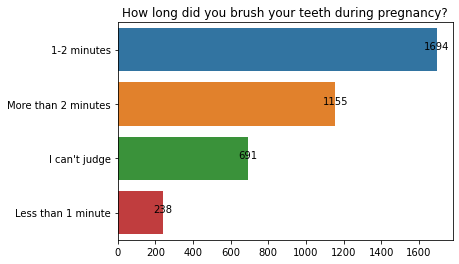

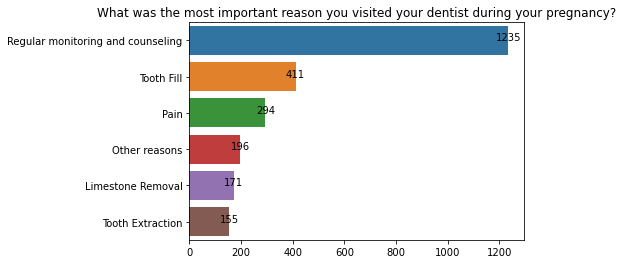

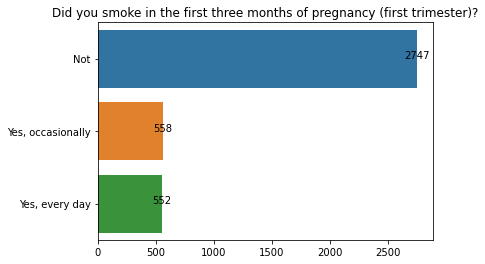

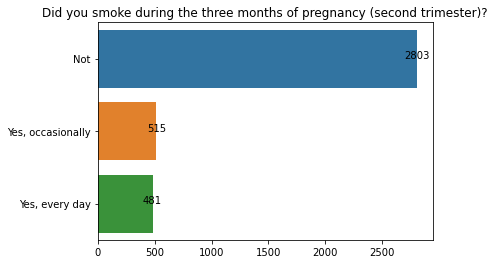

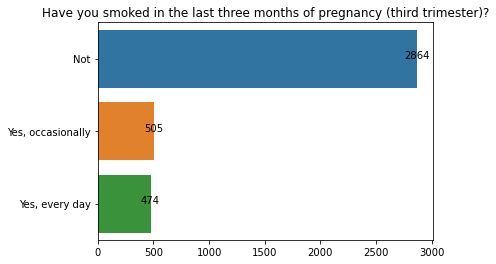

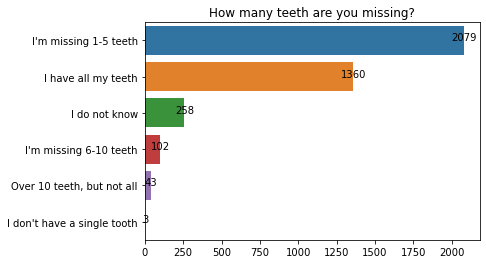

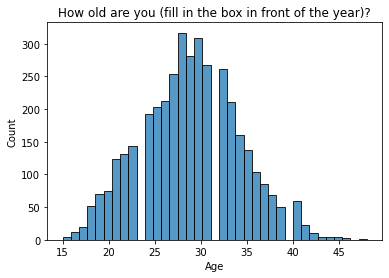

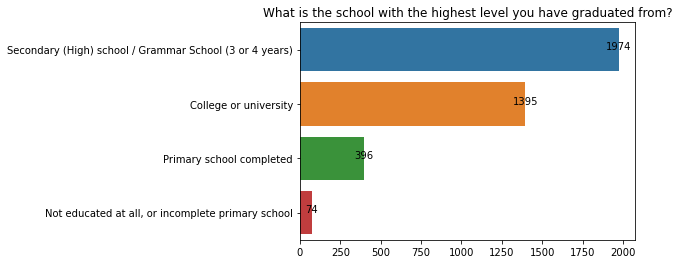

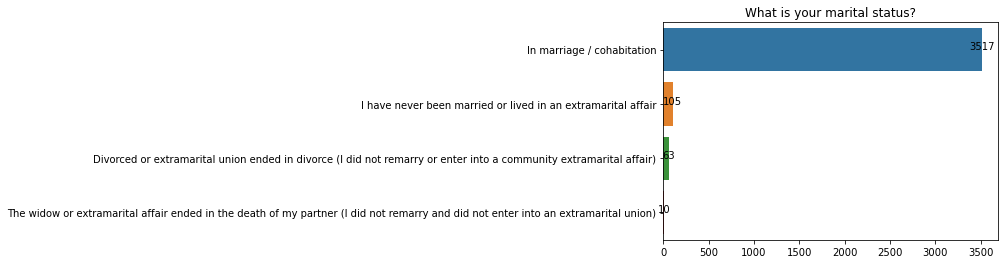

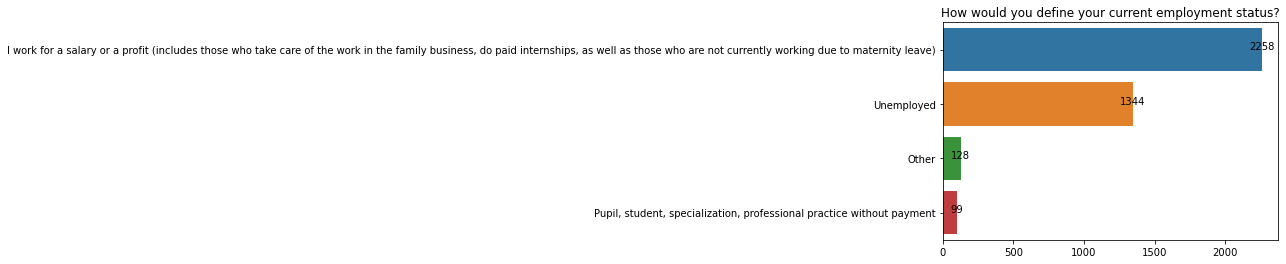

In [16]:
def barplot(idx, col, title):
    plt.figure(idx)
    if col not in numeric_col:
        val_cnts = data_subset[col].value_counts()
        text = [questions[col][val] for val in val_cnts.index]
        # replace x and y with each other for vertical plot
        ax = sns.barplot(y=text, x=val_cnts.values)
        ax.set_title(title)
        for ind, val in enumerate(val_cnts):
            ax.text(val, ind, val, color='black', ha="center")
        #for plot vertical plot
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        ax = sns.histplot(x=data_subset[col])
        ax.set_title(title)
        ax.set_xlabel('Age')
        
for idx, col in enumerate(data_subset.columns):
    title = questions[col]['text'] 
    barplot(idx, col, title)

### Check balance - for each answer Que16

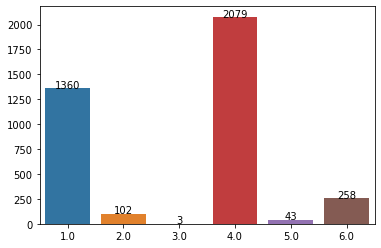

In [17]:
val_cnts = data_subset['Que16'].value_counts()
# replace x and y with each other for vertical plot
ax = sns.barplot(x=val_cnts.index, y=val_cnts.values)
for ind, val in val_cnts.items():
    ax.text(ind-1, val, val, color='black', ha="center")

### Strategy 1 - remove NaN

In [18]:
def missing_values_strategy_rem_nan(data):
    model_data = data_subset.dropna()
    model_data = model_data.reset_index(drop=True)
    return model_data

### Strategy 2 - median

In [19]:
def missing_values_strategy_median(data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    return model_data

### Strategy 3 - mean

In [20]:
def missing_values_strategy_mean(data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    # mean values are not integer numbers so rounding to int was necessary
    model_data = model_data.round()
    return model_data

### Strategy 4 - most frequent

In [21]:
def missing_values_strategy_most_freq(data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    return model_data

### Strategy 5 - constant

In [22]:
def missing_values_strategy_const(data, const):
    imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=const)
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    print(model_data)
    return model_data

### Mapping - 0 or 1

In [23]:
def perform_mapping(model_data):
    for index, row in model_data.iterrows():
        for col in cols:
            if col not in numeric_col:
                row[col] = questions_map[col][int(row[col])]
    return model_data

### Check balance - for each class Que16

In [24]:
def check_balance_for_each_class(model_data, idx, title):
    plt.figure(idx)
    val_cnts = model_data['Que16'].value_counts()
    # replace x and y with each other for vertical plot
    ax = sns.barplot(x=val_cnts.index, y=val_cnts.values)
    ax.set_title(title)
    for ind, val in val_cnts.items():
        ax.text(ind, val, val, color='black', ha="center")

def check_balance(y_values, title):
    (unique, counts) = np.unique(y_values, return_counts=True)
    ax = sns.barplot(x=unique, y=counts)
    ax.set_title(title)
    for ind, val in enumerate(counts):
        ax.text(ind, val, val, color='black', ha="center")

## Prepare data

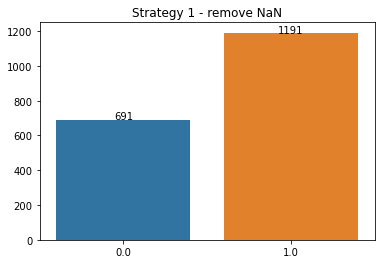

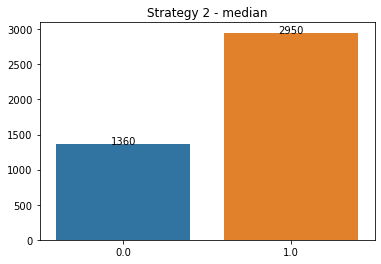

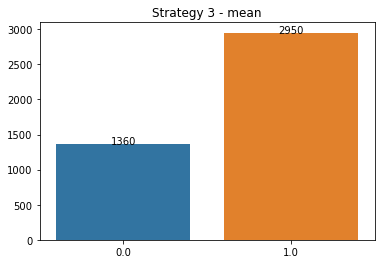

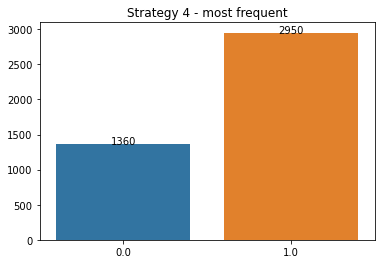

In [25]:
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 1, 'Strategy 1 - remove NaN')
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 2, 'Strategy 2 - median')
model_data = missing_values_strategy_mean(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 3, 'Strategy 3 - mean')
model_data = missing_values_strategy_most_freq(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 4, 'Strategy 4 - most frequent')

In [26]:
model_data = missing_values_strategy_mean(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)

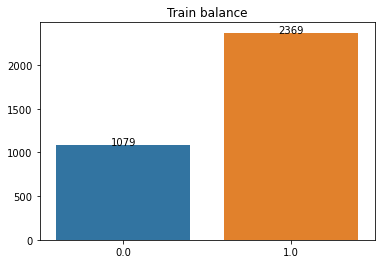

In [27]:
check_balance(y_train, 'Train balance')

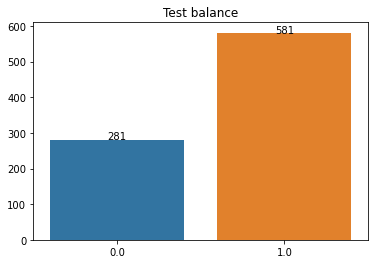

In [28]:
check_balance(y_test, 'Test balance')

### Over sampling

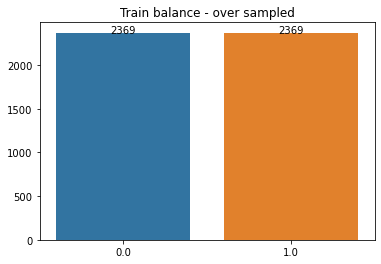

In [29]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
check_balance(y_train_resampled, 'Train balance - over sampled')

### Under sampling

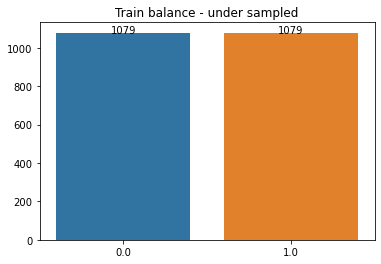

In [30]:
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
check_balance(y_train_resampled, 'Train balance - under sampled')

### Combine - under and over sampling SMOTEENN

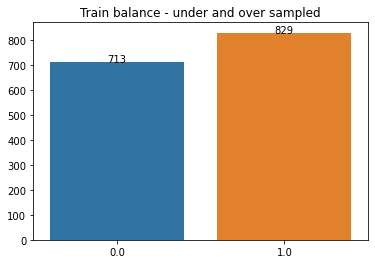

In [31]:
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
check_balance(y_train_resampled, 'Train balance - under and over sampled')

In [32]:
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

## Models

### Logistic Regression

In [33]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [34]:
pipe.score(X_test, y_test) 

0.5962877030162413